# PART 6 - ML RANDOM FOREST REGRESSION

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split


In [2]:
happy_df=pd.read_csv('/Users/nuria/Documents/datasciencecourse/FINAL PROJECT/Happiness_df ready for ML.csv')

In [3]:
happy_df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
happy_df

,Happines_score,GDP,Social_support,Life_exp_score,Freedom,Generosity,Gov_trust,Life_exp_age
0,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,73.099998
1,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,72.099998
2,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,73.000000
3,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,73.800003
4,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,71.800003
...,...,...,...,...,...,...,...,...
615,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,45.200001
616,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,61.098846
617,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,55.617260
618,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,51.000000


In [5]:
# function to calculate the metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

def print_score(clf, X_train, y_train, X_test, y_test,train=True):
    """
    Function created to evaluate the performance of the model, calculating MAE, MSE, RMSE and R2
    inputs: clf-> model to assess
            X_train, X_test
            y_train, y_test
            train -> Boolean index. If True just show the results regarding the TRAIN set, if False show TEST
    """
    
    
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        MAE_train = metrics.mean_absolute_error(y_train, pred)
        MSE_train = metrics.mean_squared_error(y_train, pred)
        RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, pred))
        R2_train = r2_score(y_train, pred)
        
        print(f"MAE: {MAE_train:.4f}\n")
        print(f"MSE: {MSE_train:.4f}\n")
        print(f"RMSE: {RMSE_train:.4f}\n")
        print(f"R^2: {R2_train:.4f}\n")
        print('================================================================')
        cv_scores = cross_val_score(clf, X_train, 
                            y_train,cv=10, scoring='r2') # Let's define the K and the 

        print('Cross Validation R2_score for train set: {}'.format(cv_scores.round(2)))
        print("\nAverage 10-Fold CV R2_score for train set: {}".format(np.mean(cv_scores).round(3)))
        print()   
        
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        MAE_test = metrics.mean_absolute_error(y_test, pred)
        MSE_test = metrics.mean_squared_error(y_test, pred)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred))
        R2_test = r2_score(y_test, pred)
        
        print(f"MAE: {MAE_test:.4f}\n")
        print(f"MSE: {MSE_test:.4f}\n")
        print(f"RMSE: {RMSE_test:.4f}\n")
        print(f"R^2: {R2_test:.4f}\n")
        
        cv_scores2 = cross_val_score(clf, X_test, 
                            y_test,cv=10, scoring='r2')
        print('Cross Validation R2_score for test set: {}'.format(cv_scores2.round(2)))
        print("\nAverage 10-Fold CV R2_score for test set: {}".format(np.mean(cv_scores2).round(3)))
        print()
        
        

OPTION 1
    - Random Forest with raw data, no transformations
    - No grid for the random forest

In [6]:
# select the features and the target variable
y = happy_df.Life_exp_age
X = happy_df.drop(columns='Life_exp_age')

In [7]:
y.shape

(620,)

In [8]:
X.shape

(620, 7)

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
#instantiate the model
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [11]:
rfreg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [12]:
print_score(rfreg, X_train, y_train, X_test, y_test, train=True)
print_score(rfreg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 0.5585

MSE: 0.6715

RMSE: 0.8194

R^2: 0.9869

Cross Validation R2_score for train set: [0.89 0.96 0.91 0.83 0.9  0.93 0.88 0.94 0.88 0.83]

Average 10-Fold CV R2_score for train set: 0.894

Test Result:
MAE: 1.4569

MSE: 4.8262

RMSE: 2.1969

R^2: 0.8970

Cross Validation R2_score for test set: [0.73 0.82 0.94 0.88 0.92 0.93 0.95 0.88 0.77 0.87]

Average 10-Fold CV R2_score for test set: 0.867



In [19]:
ypred1=rfreg.predict(X_test)

In [20]:
df1=pd.DataFrame({'Real':y_test,'Pred_Raw':ypred1})

In [21]:
df1

,Real,Pred_Raw
49,74.180000,60.847769
584,66.006149,66.354947
82,68.300003,66.364683
305,61.099998,58.632433
109,63.799999,60.241803
...,...,...
182,66.400002,66.745166
495,64.808945,65.709142
411,67.000000,67.728630
18,72.099998,69.639533


OPTION 2
    - Tuning the Random Forest Regression
    - Raw data

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [23]:
grid = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}

In [24]:
rfreg2 = RandomForestRegressor()

In [25]:
rf_grid = RandomizedSearchCV(estimator = rfreg2, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [26]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [27]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400)

In [28]:
rf_grid=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
rf_grid.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400)

In [30]:
print_score(rf_grid, X_train, y_train, X_test, y_test, train=True)
print_score(rf_grid, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 0.0000

MSE: 0.0000

RMSE: 0.0000

R^2: 1.0000

Cross Validation R2_score for train set: [0.93 0.9  0.91 0.89 0.92 0.95 0.91 0.94 0.9  0.83]

Average 10-Fold CV R2_score for train set: 0.906

Test Result:
MAE: 1.3436

MSE: 4.1000

RMSE: 2.0248

R^2: 0.9125

Cross Validation R2_score for test set: [0.83 0.88 0.93 0.92 0.91 0.96 0.96 0.92 0.87 0.87]

Average 10-Fold CV R2_score for test set: 0.906



In [31]:
y_pred2=rf_grid.predict(X_test)

In [32]:
df2=pd.DataFrame({'Real':y_test,'Pred_grid':y_pred2})

In [33]:
df_predictions=df1.copy()
df_predictions['Pred_Tune']=df2.Pred_grid

In [34]:
df_predictions

,Real,Pred_Raw,Pred_Tune
49,74.180000,60.847769,61.688817
584,66.006149,66.354947,65.653678
82,68.300003,66.364683,66.650667
305,61.099998,58.632433,59.109930
109,63.799999,60.241803,60.197756
...,...,...,...
182,66.400002,66.745166,67.019015
495,64.808945,65.709142,65.828330
411,67.000000,67.728630,66.802652
18,72.099998,69.639533,71.144841


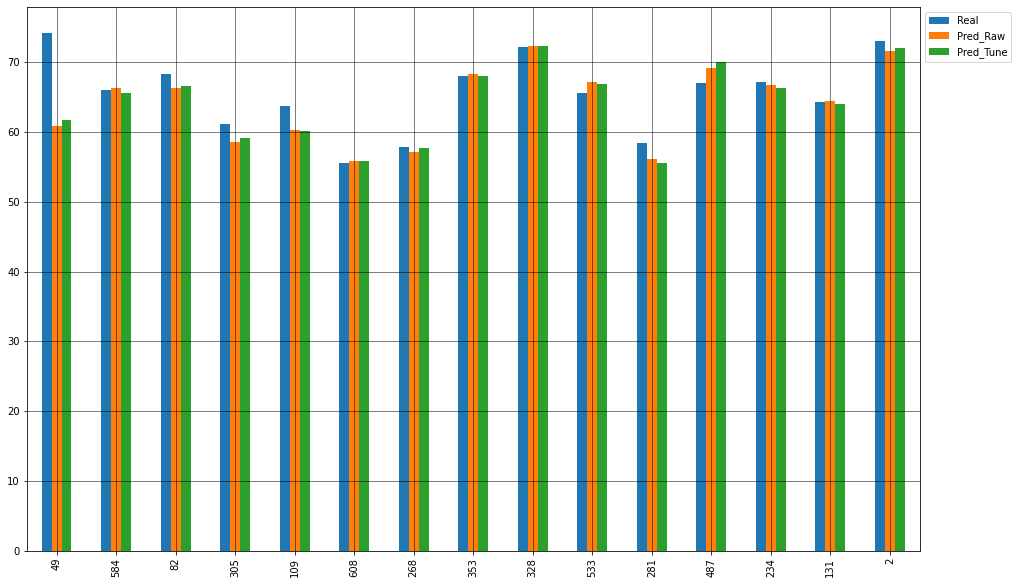

In [35]:
import matplotlib.pyplot as plt
df_predictions_plot = df_predictions.head(15)#get the 15 first predictions
df_predictions_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1, 1.00))
plt.show()


In [36]:
best_pred_randomforest=df_predictions[['Real','Pred_Tune']]

In [38]:
best_pred_randomforest.to_csv('best predictions random forest',index=False)